<a href="https://colab.research.google.com/github/Angel353/Concentracion_CADII/blob/main/RegresionLineal/ActividadesClase/RegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivo desde seaborn

df = sns.load_dataset(name = "car_crashes")
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Axes: xlabel='alcohol', ylabel='total'>

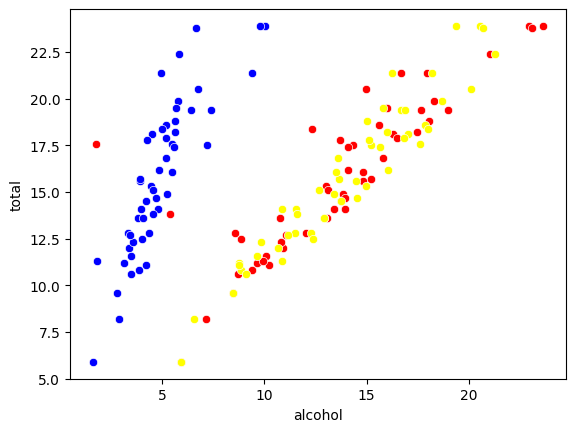

In [5]:
# Imprimimos el scatterplot entre la variable dependiente (total) e independiente (alcohol) para observar el comportamiento
from turtle import color

sns.scatterplot(x = 'alcohol', y = 'total', color = 'blue', data = df) # Variable independiente, dependiente, color y df
sns.scatterplot(x = 'not_distracted', y = 'total', color = 'red', data = df)
sns.scatterplot(x = 'no_previous', y = 'total', color = 'yellow', data = df)

In [6]:
# Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep = df[["alcohol","not_distracted","no_previous"]]
Var_Dep = df[["total"]]

In [7]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [9]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol', 'not_distracted', 'no_previous'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[0.46502589, 0.17447717, 0.72341887]]),
 'rank_': 3,
 'singular_': array([40.18683158, 14.5996668 ,  6.82237276]),
 'intercept_': array([1.01810937])}

**Modelo matemático: y = 0.17447717x1 + 0.46502589x2 + 0.72341887x3 + 1.01810937**

In [10]:
# Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred = model.predict(X = df[["alcohol",'not_distracted',"no_previous"]])
y_pred

array([[17.67003903],
       [18.27283315],
       [19.08336273],
       [22.79456484],
       [12.21200051],
       [14.01008239],
       [10.87211497],
       [17.33940815],
       [ 7.0564822 ],
       [18.47759458],
       [15.91282285],
       [17.87246972],
       [16.19744727],
       [14.03058234],
       [15.34206108],
       [15.38162704],
       [16.34141146],
       [17.9850241 ],
       [21.30854534],
       [14.59262809],
       [13.37900625],
       [ 8.34308154],
       [13.04531186],
       [ 9.89816713],
       [16.5945425 ],
       [15.93153363],
       [21.69218388],
       [15.56199648],
       [16.17007954],
       [11.36229987],
       [10.47678184],
       [18.5240015 ],
       [11.68383921],
       [16.03959155],
       [24.68349487],
       [14.04713918],
       [20.42837505],
       [12.39581705],
       [18.27652705],
       [11.10500944],
       [23.58276801],
       [19.38188537],
       [17.86412166],
       [19.73636376],
       [11.44152498],
       [14

In [11]:
# Insertamos la columna de preddiciones en el df
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.670039,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.272833,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,19.083363,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.794565,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.212001,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,14.010082,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.872115,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,17.339408,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,7.056482,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,18.477595,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


<Axes: xlabel='no_previous', ylabel='total'>

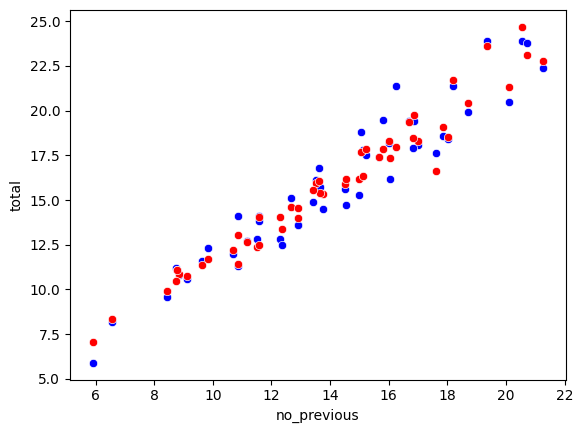

In [13]:
# Visualización de la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x = 'no_previous', y = 'total', color = 'blue', data = df)
sns.scatterplot(x = 'no_previous', y = 'Predicciones', color = "red", data = df)

<Axes: xlabel='no_previous', ylabel='total'>

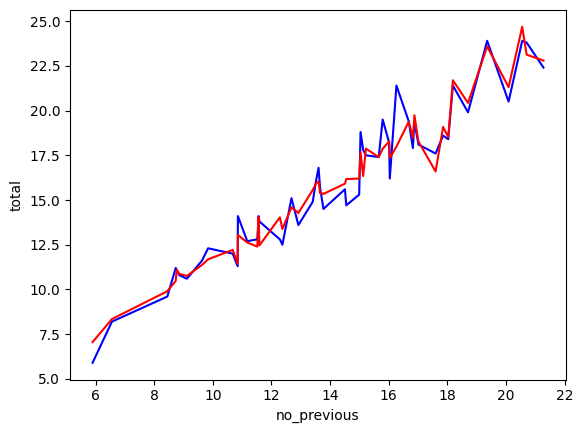

In [15]:
# En formato de línea
sns.lineplot(x = 'no_previous', y = 'total', color = 'blue', data = df)
sns.lineplot(x = 'no_previous', y = 'Predicciones', color = "red", data = df)

In [16]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9560217071285985

In [17]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9777636253863192